In [100]:
## Data Preprocessing
import pandas as pd
import numpy as np

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Modeling
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# from sklearn import ensemble
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    GridSearchCV
from sklearn.preprocessing import label_binarize, StandardScaler

## Accuracy calculation
from sklearn import metrics
from sklearn.metrics import auc, \
                            confusion_matrix, \
                            classification_report, \
                            roc_curve, \
                            roc_auc_score, \
                            precision_recall_curve, \
                            average_precision_score, \
                            accuracy_score, \
                            balanced_accuracy_score, \
                            precision_score, \
                            recall_score

## Generate Dataset
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

## Find out execution time
from datetime import datetime

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-white')

In [101]:
df = pd.read_csv('_inputs/Wine.csv')

In [102]:
df.shape

(178, 14)

In [103]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# PCA

In [104]:
X = df.drop(columns=['Type'])
Y = df[['Type']]

X = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

X = pd.DataFrame(data = principalComponents
             , columns = ['pc_1', 'pc_2'])

X.head(5)

,pc_1,pc_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [105]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3)

# SVM

In [107]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    '''
    Define a function to plot a classifier with support vectors.
    Parameters
    ----------
    svc : sklearn.svm.classes.SVC
        Pretrained support vector classifier
    X : dataframe
        Pandas data
    y : series or list
        Labels
    h : float
    pad : float
    Returns
    ----------
    None : Just plot the graph
    '''
    
    x_min, x_max = X.iloc[:, 0].min()-pad, X.iloc[:, 0].max()+pad
    y_min, y_max = X.iloc[:, 1].min()-pad, X.iloc[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X.iloc[:,0], X.iloc[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

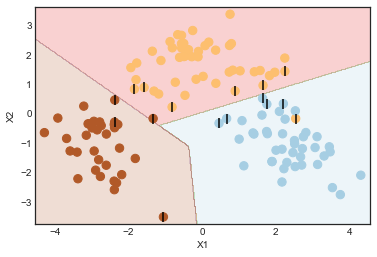

Number of support vectors:  16


In [108]:
# Support Vector Classifier with linear kernel.
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X_train, y_train)

plot_svc(svc, X_train, y_train['Type'])

In [111]:
# Select the optimal C parameter by cross-validation
startTime = datetime.now()

tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)

print(clf.best_params_)

print('Best parameter finding time: ', datetime.now() - startTime)

{'C': 0.01}
Best parameter finding time:  0:00:00.614502


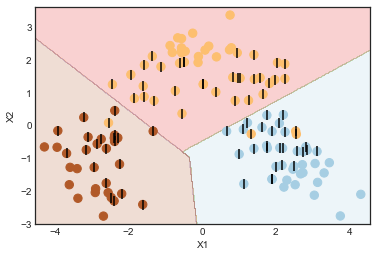

Number of support vectors:  83


In [99]:
# Support Vector Classifier with linear kernel.
svc = SVC(C= 0.01, kernel='linear')
svc.fit(X_train, y_train)

plot_svc(svc, X_train, y_train['Type'])